In [1]:
from feature_selector import *

import pandas as pd
import numpy as np
import seaborn as sns

from scipy.spatial import distance
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.cluster import SpectralCoclustering
from sklearn.metrics import consensus_score

In [2]:
df_ionizable_train: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_train_divprio.csv", delimiter=';')
df_ionizable_train["TYPE"] = "TRAIN"
df_ionizable_test: pd.DataFrame = pd.read_csv("../../Data/ionizable_dataset_72_test_divprio.csv", delimiter=';')
df_ionizable_test["TYPE"] = "TEST"

df_ionizable = pd.concat([df_ionizable_train, df_ionizable_test])
FS_ionizable: FeatureSelector = FeatureSelector(df_ionizable, cols_to_ignore=["TYPE"])

# FS_io_train.scale_data(inplace=True)
# FS_io_test.scale_data(inplace=True)


df_neutral_train: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_train_divprio.csv", delimiter=';')
df_neutral_train["TYPE"] = "TRAIN"
df_neutral_test: pd.DataFrame = pd.read_csv("../../Data/neutral_dataset_111_test_divprio.csv", delimiter=';')
df_neutral_test["TYPE"] = "TEST"

df_neutral = pd.concat([df_neutral_train, df_neutral_test])
FS_neutral: FeatureSelector = FeatureSelector(df_neutral, cols_to_ignore=["TYPE"])

# FS_ne_train.scale_data(inplace=True)
# FS_ne_test.scale_data(inplace=True)

df_full_train: pd.DataFrame = pd.read_csv("../../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_train["TYPE"] = "TRAIN"
df_full_test: pd.DataFrame = pd.read_csv("../../Data/full_dataset_test_divprio.csv", delimiter=';')
df_full_test["TYPE"] = "TEST"

df_full = pd.concat([df_full_train, df_full_test])
FS_full: FeatureSelector = FeatureSelector(df_full, cols_to_ignore=["TYPE"])


# FS_full_train: FeatureSelector = FeatureSelector(df_full_train)
# FS_full_test: FeatureSelector = FeatureSelector(df_full_test)

In [71]:
# FS_full.df[["vsurf_W8", "vsurf_HB8"]]
# dropped = FS_full.remove_highly_correlated(verbose=True)

Stats=  3.2222088117322376 
p=  0.19966697887942364
Gaussian


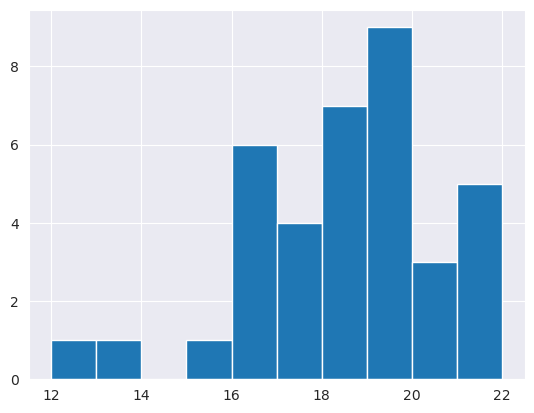

In [72]:
# Test de normalité
from scipy.stats import shapiro, normaltest
from matplotlib import pyplot


data = df_full_test.iloc[:,14]

stat, p = normaltest(data)

print("Stats= ", stat, "\np= ", p)
alpha = 0.05


if p > alpha:
    print("Gaussian")
else:
    print("Not gaussian")


pyplot.hist(data)
pyplot.show()

# Low variance features
We try to detect every feature that has a variance below the threshold

## IONIZABLE

In [3]:
print("Before low variance removal: ", df_ionizable.shape)
df_ionizable_lv, col_ionizable_lv = FS_ionizable.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_ionizable_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_ionizable_lv))

df_ionizable = df_ionizable.drop(list(col_ionizable_lv), axis=1)
print("After low variance removal: ", df_ionizable.shape)

Before low variance removal:  (72, 480)
['a_nB', 'a_nBr', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-17)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-21)', 'MACCS(-23)', 'MACCS(-26)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-46)', 'MACCS(-48)', 'MACCS(-49)', 'MACCS(-68)', 'MACCS(-69)', 'MACCS(166)', 'nmol', 'vsurf_Wp8']
length of the feature with low variance that are common for train and test:  39
After low variance removal:  (72, 441)


## NEUTRAL

In [4]:
print("Before low variance removal: ", df_neutral.shape)
df_neutral_lv, col_neutral_lv = FS_neutral.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_neutral_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_neutral_lv))

df_neutral = df_neutral.drop(list(col_neutral_lv), axis=1)
print("After low variance removal: ", df_neutral.shape)

Before low variance removal:  (111, 480)
['a_nB', 'a_nI', 'a_nP', 'E_stb', 'FCharge', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-13)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-24)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-34)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-41)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-49)', 'MACCS(-68)', 'MACCS(166)', 'nmol']
length of the feature with low variance that are common for train and test:  36
After low variance removal:  (111, 444)


## FULL

In [5]:
print("Before low variance removal: ", df_full.shape)
df_full_lv, col_full_lv = FS_full.remove_low_variance(variance_threshold=0, cols_to_ignore=["TYPE"], inplace=True)
print(col_full_lv)
print("length of the feature with low variance that are common for train and test: ", len(col_full_lv))
df_full = df_full.drop(list(col_full_lv), axis=1)
print("After low variance removal: ", df_full.shape)

Before low variance removal:  (183, 480)
['a_nB', 'a_nI', 'a_nP', 'E_stb', 'MACCS(--1)', 'MACCS(--2)', 'MACCS(--3)', 'MACCS(--4)', 'MACCS(--5)', 'MACCS(--6)', 'MACCS(--7)', 'MACCS(--9)', 'MACCS(-10)', 'MACCS(-12)', 'MACCS(-14)', 'MACCS(-15)', 'MACCS(-18)', 'MACCS(-20)', 'MACCS(-27)', 'MACCS(-29)', 'MACCS(-30)', 'MACCS(-31)', 'MACCS(-35)', 'MACCS(-39)', 'MACCS(-40)', 'MACCS(-44)', 'MACCS(-48)', 'MACCS(-68)', 'MACCS(166)', 'nmol']
length of the feature with low variance that are common for train and test:  30
After low variance removal:  (183, 450)


# Detect binary data

In [76]:
from sklearn.feature_selection import VarianceThreshold

dfs: dict = {
    "ionizable": df_ionizable.loc[:, df_ionizable.isin([0,1]).all()],
    "neutral": df_neutral.loc[:, df_neutral.isin([0,1]).all()],
    "full": df_full.loc[:, df_full.isin([0,1]).all()]
}


for key, value in dfs.items():
    suspect_cols = []
    for i in range(value.shape[1]):
        aled = value[value.columns[i]].value_counts()
        percentage = aled.min() / aled.sum() * 100
        if (percentage < 1).any():
            suspect_cols.append(aled)
    print("===== ", key, " =====")
    print(suspect_cols)


=====  ionizable  =====
[]
=====  neutral  =====
[b_triple
0    110
1      1
Name: count, dtype: int64, MACCS(--8)
0    110
1      1
Name: count, dtype: int64, MACCS(-16)
0    110
1      1
Name: count, dtype: int64, MACCS(-21)
0    110
1      1
Name: count, dtype: int64, MACCS(-23)
0    110
1      1
Name: count, dtype: int64]
=====  full  =====
[MACCS(-13)
0    182
1      1
Name: count, dtype: int64, MACCS(-21)
0    182
1      1
Name: count, dtype: int64, MACCS(-23)
0    182
1      1
Name: count, dtype: int64, MACCS(-34)
0    182
1      1
Name: count, dtype: int64]


# High correlation feature

## IONIZABLE

0.000621043764738141
0.004591183539776963
0.05017449019613641
0.010790048258333539
0.2083184053977386
0.02600310625397384
0.12718388916407505
0.07676802157692601
0.04004087799901353
0.01675823086161086
0.059266685771614556
0.032167721130665086
0.23839860960153392
0.03599313426089147
0.06198127281465816
0.11391690738841397
0.09071866964945755
0.15238450804595985
0.039543580951920024
0.06201443208834014
0.06115745137403165
0.16839407117936178
0.22864099933604168
BEST SCORE:  0.23839860960153392 
Best n:  14


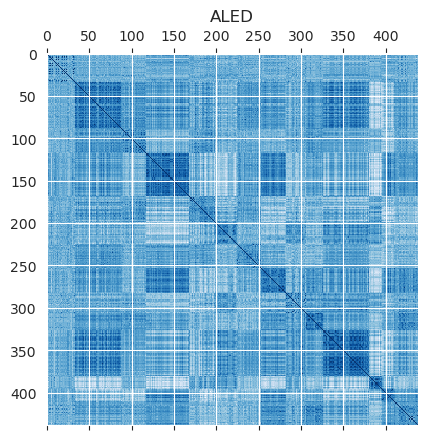

Three big clusters: 
	2:  (54, 54) 
	4:  (51, 51) 
	11:  (54, 54)


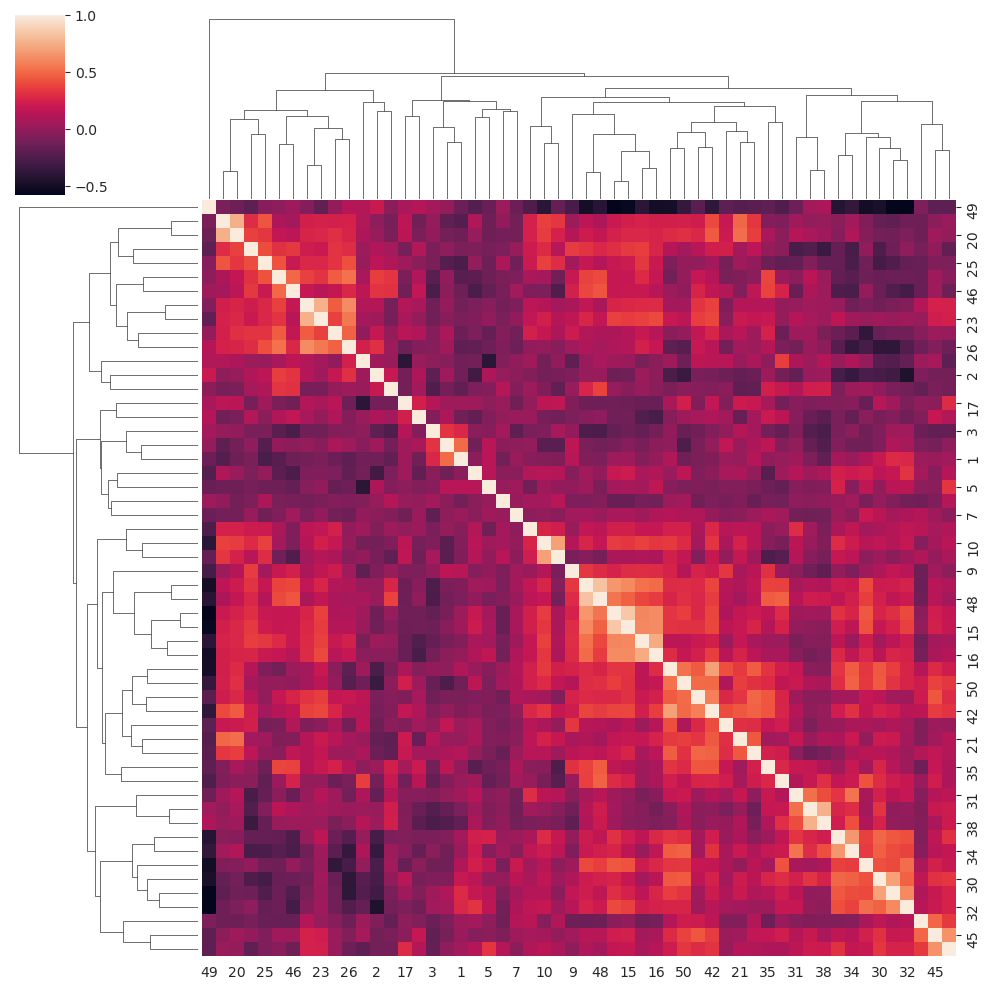

In [167]:
# df_io_corr = FS_ionizable.get_correlation()
#
# best_n = 0
# best_score = 0
# for i in range(2,25):
#
#     model = SpectralCoclustering(n_clusters=i, random_state=0)
#     model.fit(df_io_corr.abs())
#
#
#
#     score = consensus_score(model.biclusters_, (df_io_corr.iloc[model.row_labels_], df_io_corr.iloc[:, model.column_labels_]))
#     print(score)
#     if best_score < score < 1:
#         best_score = score
#         best_n = i
#
# print("BEST SCORE: ", best_score, "\nBest n: ", best_n)
#
# model = SpectralCoclustering(n_clusters=best_n, random_state=0)
# model.fit(df_io_corr)
#
# fit_data = df_io_corr.iloc[np.argsort(model.row_labels_)]
# fit_data = fit_data.iloc[:, np.argsort(model.column_labels_)]
#
# plt.matshow(fit_data, cmap=plt.cm.Blues)
# plt.title("ALED")
# plt.show()
#
#
# print("Three big clusters: \n\t2: ",model.get_shape(1), "\n\t4: ", model.get_shape(3), "\n\t11: ", model.get_shape(10))
#
# # sns.clustermap(model.get_submatrix(1, fit_data))

<Axes: >

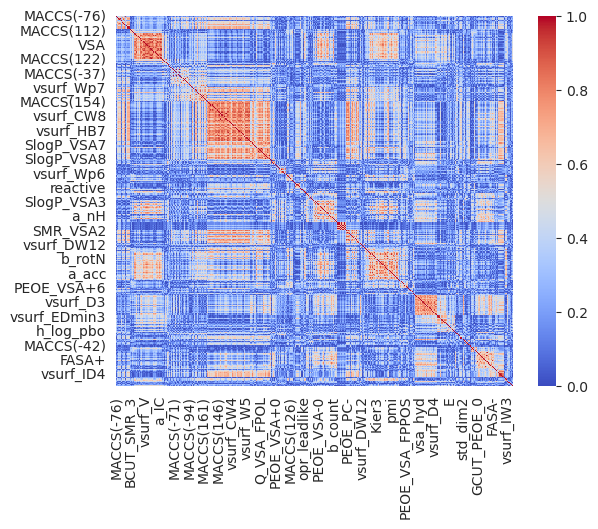

In [188]:
# https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

df_io_corr = FS_ionizable.get_correlation()

# Calculates the distance of all our features
dissimalarity: pd.DataFrame = 1 - abs(df_io_corr)

# Squareform: creates a vector distance matrix
# linkage: performs hierarchically clustering
Z = linkage(squareform(dissimalarity), "complete")

# The higher the distance the fewer clusters will be formed
threshold = 0.9
# Forms flat clusters given by a linkage matrix
labels = fcluster(Z, threshold, criterion="distance")


# Keep the indices to sort the labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
clustered = df_io_corr.iloc[:, labels_order]

# Recreate a correlation matrix from the clustered distance matrix
correlations = abs(clustered.corr("kendall"))

sns.heatmap(round(correlations,2), cmap="coolwarm",  vmin=0, vmax=1)

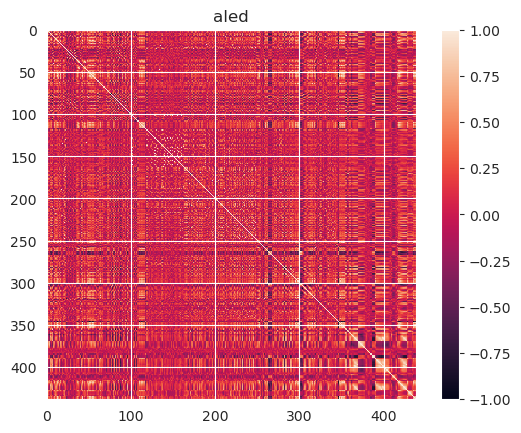

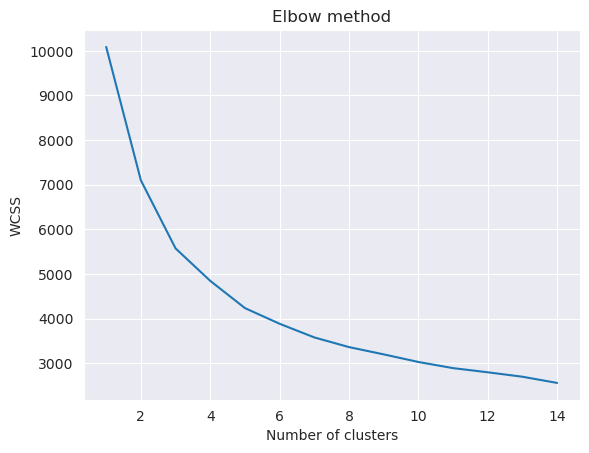

In [193]:
from sklearn.cluster import KMeans

df_io_corr = FS_ionizable.get_correlation()

corr_feat_mtx = df_io_corr.to_numpy()
plt.figure()
plt.imshow(df_io_corr, interpolation="nearest")
plt.colorbar()
plt.title("aled")
plt.show()

wcss = []
max_num_clusters = 15
for i in range(1, max_num_clusters):
    kmeans = KMeans(n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=0)
    kmeans.fit(corr_feat_mtx)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, max_num_clusters), wcss)
plt.title("Elbow method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [194]:
n_clusters_kmeans = 5
kmeans = KMeans(n_clusters=n_clusters_kmeans, init="k-means++", max_iter=300, n_init=10, random_state=0)
corr_feat_labels = kmeans.fit_predict(corr_feat_mtx)

# Preparing a dataframe to collect some cluster stats
corr_feat_clust_df = pd.DataFrame(np.c_[df_io_corr.columns, corr_feat_labels])
corr_feat_clust_df.columns = ["feature", "cluster"]
corr_feat_clust_df["feat_list"] = corr_feat_clust_df.groupby(["cluster"]).transform(lambda x: ", ".join(x))
corr_feat_clust_df = corr_feat_clust_df.groupby(["cluster", "feat_list"]).size().reset_index(name = "feat_count")
corr_feat_clust_df

,cluster,feat_list,feat_count
0,0,"a_nF, BCUT_PEOE_0, BCUT_SLOGP_0, BCUT_SMR_0, B...",103
1,1,"ASA+, ASA_H, a_hyd, a_nH, BCUT_PEOE_1, BCUT_PE...",103
2,2,"apol, ASA, a_acc, a_count, a_heavy, a_IC, a_nC...",83
3,3,"a_aro, a_base, a_nCl, balabanJ, BCUT_PEOE_2, B...",57
4,4,"ASA-, ASA_P, a_acid, a_don, a_donacc, a_ICM, a...",93


In [197]:
# each dimension is the distance to the cluster centers
corr_node_dist = kmeans.transform(df_io_corr)
# creates four cols: feature names, correlation distance by kmeans, normalized correlation distance by kmeans, cluster correlation
corr_clust_dist = np.c_[df_io_corr.columns, np.round(corr_node_dist.min(axis=1), 3), np.round(corr_node_dist.min(axis=1)/np.max(corr_node_dist.min(axis=1)), 3), corr_feat_labels]
corr_clust_dist_df = pd.DataFrame(corr_clust_dist)
corr_clust_dist_df.columns = ["features", "dist_corr", "dist_corr_norm", "cluster_corr"]
corr_clust_dist_df

/home/penpen/mambaforge/envs/qsar/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


,features,dist_corr,dist_corr_norm,cluster_corr
0,apol,2.407,0.379,2
1,ASA,1.65,0.26,2
2,ASA+,3.055,0.481,1
3,ASA-,3.406,0.536,4
4,ASA_H,3.225,0.508,1
...,...,...,...,...
434,vsurf_Wp7,3.403,0.536,0
435,Weight,1.949,0.307,2
436,weinerPath,1.854,0.292,2
437,weinerPol,2.516,0.396,2


In [225]:
from matplotlib import patches


# Groups together in correlation matrix features with the same labels
def clustering_corr_matrix(corr_matrix, clustered_features) -> np.ndarray:
    print(type(corr_matrix))
    print(type(clustered_features))

    npm = corr_matrix.to_numpy()
    # New array filled with zeros of shape (len, len)
    npm_zero: np.ndarray = np.zeros(shape=(len(npm), len(npm)))
    n: int = 0
    for i in clustered_features:
        m = 0
        for j in clustered_features:
            npm_zero[n,m] = npm[i-1, j-1]
            m += 1
        n += 1
    return npm_zero

# Preprocessing the correlation matrix before starting the clustering based on labels
def processing_clusterd_corr_matrix(feat_labels, corrMatrix):

    lst_lab = list(feat_labels)
    lst_feat = corrMatrix.columns

    lab_feat_map = {lst_feat[i].replace("feature_" , "") : lst_lab[i] for i in range(len(lst_lab))}

    lab_feat_map_sorted = {k: v for k, v in sorted(lab_feat_map.items(), key=lambda item: item[1])}

    clustered_features = list(map(int,lab_feat_map_sorted.keys()))
    print(len(clustered_features))
    return clustering_corr_matrix(corrMatrix, clustered_features)

# Function to plot the clustered features
def plot_clustered_matrix(clust_mtx, feat_clust_list):
    plt.figure()

    fig, ax = plt.subplots(1)

    im = ax.imshow(clust_mtx, interpolation="nearest")

    corner = 0
    for s in feat_clust_list:
        rect = patches.Rectangle((float(corner), float(corner)), float(s), float(s), angle=0.0, linewidth=2, edgecolor="r", facecolor="none")
        ax.add_patch(rect)
        corner += s
        ax.add_patch(rect)

    fig.colorbar(im)

    plt.title("Clustered Feature by correlation")
    plt.show()

clust_mtx = processing_clusterd_corr_matrix(corr_feat_labels, df_io_corr)
plot_clustered_matrix(clust_mtx, corr_feat_clust_df["feat_count"].to_numpy())

ValueError: invalid literal for int() with base 10: 'a_nF'

<Axes: >

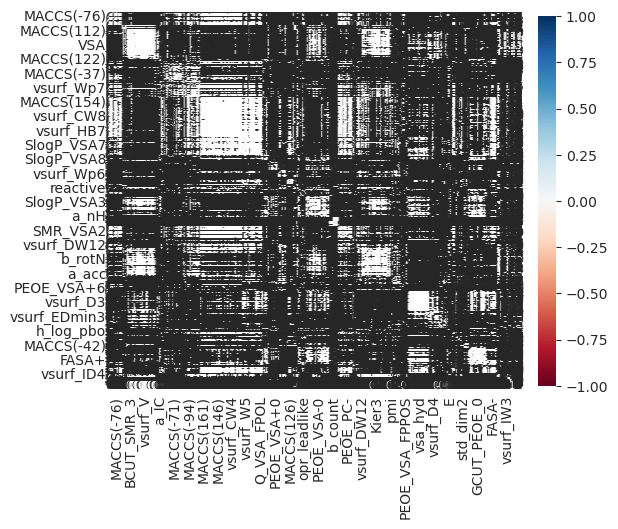

In [175]:
threshold = 0.9
labels = fcluster(Z, threshold, criterion="distance")
labels

labels_order = np.argsort(labels)

clustered = df_io_corr.iloc[:, labels_order]





correlations = clustered.corr("kendall")
sns.heatmap(round(correlations,2), cmap="RdBu", annot=True, annot_kws={"size": 7}, vmin=-1, vmax=1)

<Axes: >

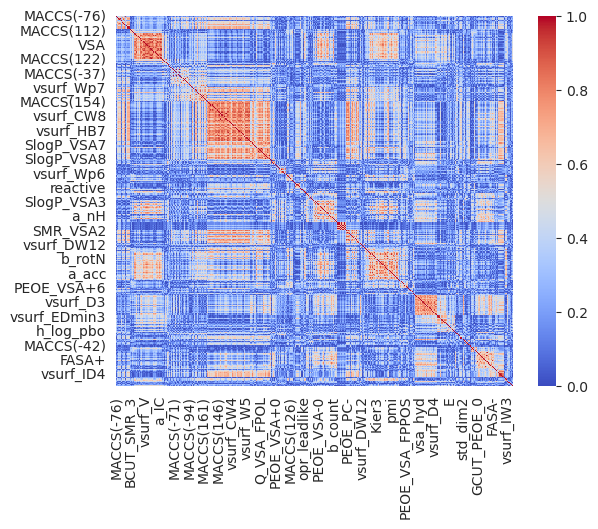

Before high correlation removal:  (72, 441)


After high correlation removal:  (72, 345)


Index(['ASA', 'E_nb', 'FASA-', 'FASA_H', 'FCharge', 'GCUT_SLOGP_0',
       'MACCS(--8)', 'MACCS(-11)', 'MACCS(-16)', 'MACCS(-32)', 'MACCS(-33)',
       'MACCS(-50)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-56)', 'MACCS(-60)',
       'MACCS(-61)', 'MACCS(-63)', 'MACCS(-67)', 'MACCS(-73)', 'MACCS(-81)',
       'MACCS(-83)', 'MACCS(-88)', 'MACCS(-92)', 'MACCS(117)', 'MACCS(119)',
       'MACCS(124)', 'MACCS(134)', 'MACCS(138)', 'MACCS(146)', 'MACCS(148)',
       'MACCS(159)', 'MACCS(160)', 'MACCS(161)', 'PC+', 'PC-', 'PEOE_VSA_FHYD',
       'PEOE_VSA_FNEG', 'Q_RPC+', 'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG', 'SMR',
       'VAdjEq', 'VAdjMa', 'VDistMa', 'VSA', 'Weight', 'a_acid', 'a_count',
       'a_donacc', 'a_heavy', 'a_nCl', 'a_nF', 'a_nN', 'a_nO', 'a_nS', 'apol',
       'b_ar', 'b_heavy', 'b_rotN', 'b_triple', 'chi0_C', 'chi0v_C', 'chi1',
       'diameter', 'h_pstrain', 'mr', 'opr_brigid', 'opr_nring', 'petitjean',
       'pmi2', 'pmi3', 'radius', 'vdw_area', 'vdw_vol', 'vol', 'vsurf_CW6',
  

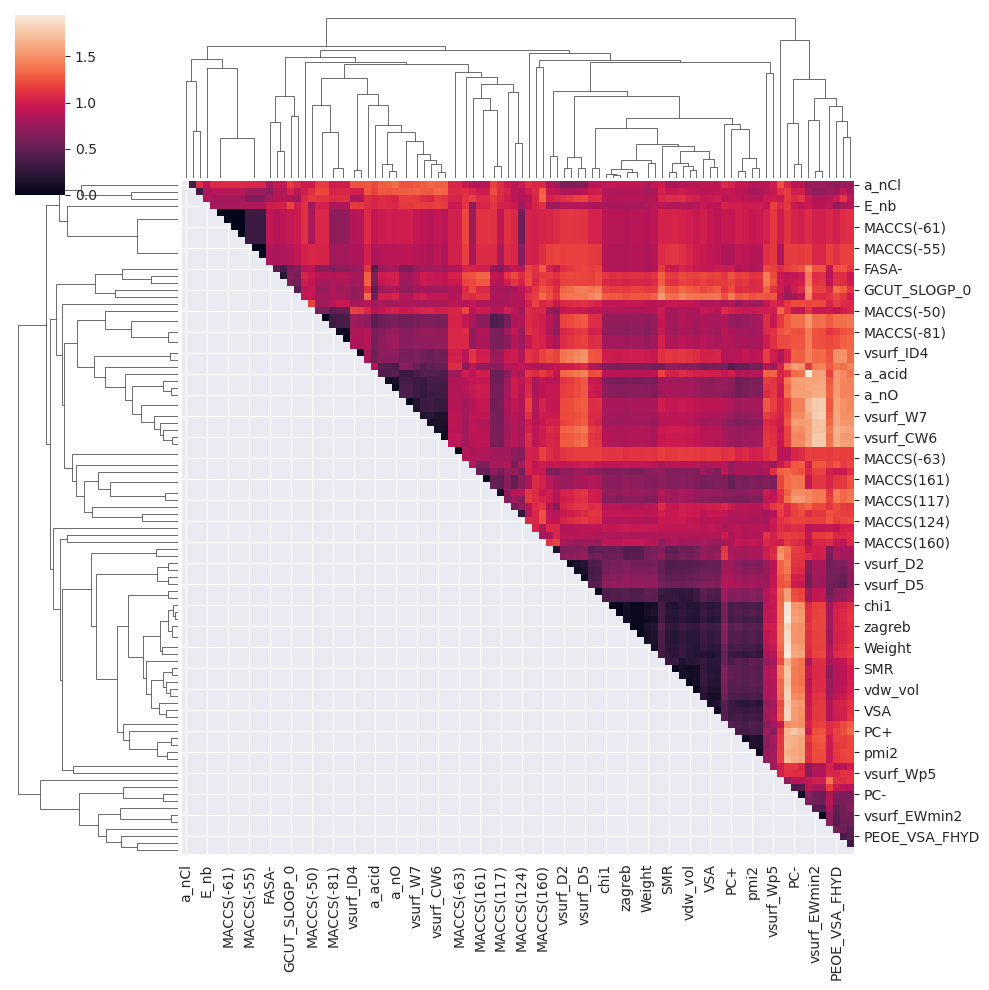

In [77]:
print("Before high correlation removal: ", df_ionizable.shape)
df_ionizable_correlation_removed = FS_ionizable.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_ionizable_correlation_removed.shape)
df_ionizable[df_ionizable.columns.difference(df_ionizable_correlation_removed.columns)].columns

## Neutral

Before high correlation removal:  (111, 444)


After high correlation removal:  (111, 333)


Index(['ASA', 'ASA_H', 'ASA_P', 'BCUT_SMR_0', 'CASA+', 'FASA-', 'FASA_H',
       'FASA_P', 'Kier1', 'MACCS(-32)', 'MACCS(-33)', 'MACCS(-51)',
       'MACCS(-55)', 'MACCS(-56)', 'MACCS(-60)', 'MACCS(-61)', 'MACCS(-73)',
       'MACCS(-76)', 'MACCS(-81)', 'MACCS(-85)', 'MACCS(-87)', 'MACCS(-99)',
       'MACCS(107)', 'MACCS(110)', 'MACCS(118)', 'MACCS(158)', 'MACCS(161)',
       'PC+', 'PC-', 'PEOE_PC+', 'PEOE_VSA_FHYD', 'PEOE_VSA_FNEG',
       'PEOE_VSA_FPNEG', 'PEOE_VSA_FPPOS', 'PEOE_VSA_PNEG', 'Q_PC+', 'Q_RPC+',
       'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG', 'Q_VSA_FPNEG', 'Q_VSA_FPOL',
       'Q_VSA_FPOS', 'Q_VSA_FPPOS', 'Q_VSA_NEG', 'Q_VSA_PNEG', 'Q_VSA_POS',
       'TPSA', 'VAdjEq', 'VAdjMa', 'VSA', 'a_acc', 'a_acid', 'a_aro', 'a_base',
       'a_count', 'a_heavy', 'a_nBr', 'a_nCl', 'a_nF', 'a_nN', 'a_nO', 'a_nS',
       'apol', 'b_1rotN', 'b_1rotR', 'b_heavy', 'b_triple', 'chi0', 'chi0_C',
       'h_logP', 'h_logS', 'h_log_dbo', 'h_mr', 'h_pstates', 'mr',
       'opr_brigid', 'opr_n

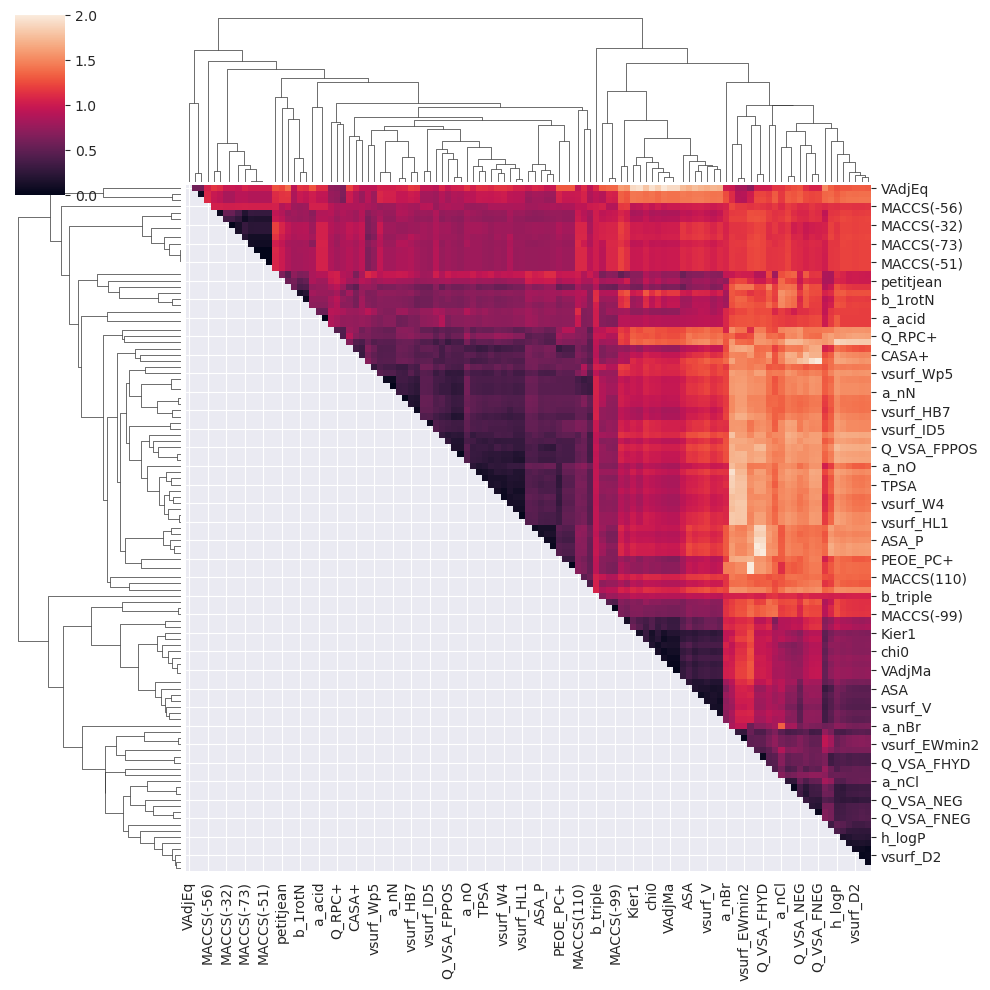

In [87]:
print("Before high correlation removal: ", df_neutral.shape)
df_neutral_correlation_removed = FS_neutral.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_neutral_correlation_removed.shape)
with pd.option_context('display.max_rows', None, 'display.max_columns', None, 'display.max_seq_items', None):  # more options can be specified also
    display(df_neutral[df_neutral.columns.difference(df_neutral_correlation_removed.columns)].columns)

## Full

Before high correlation removal:  (183, 450)


After high correlation removal:  (183, 359)


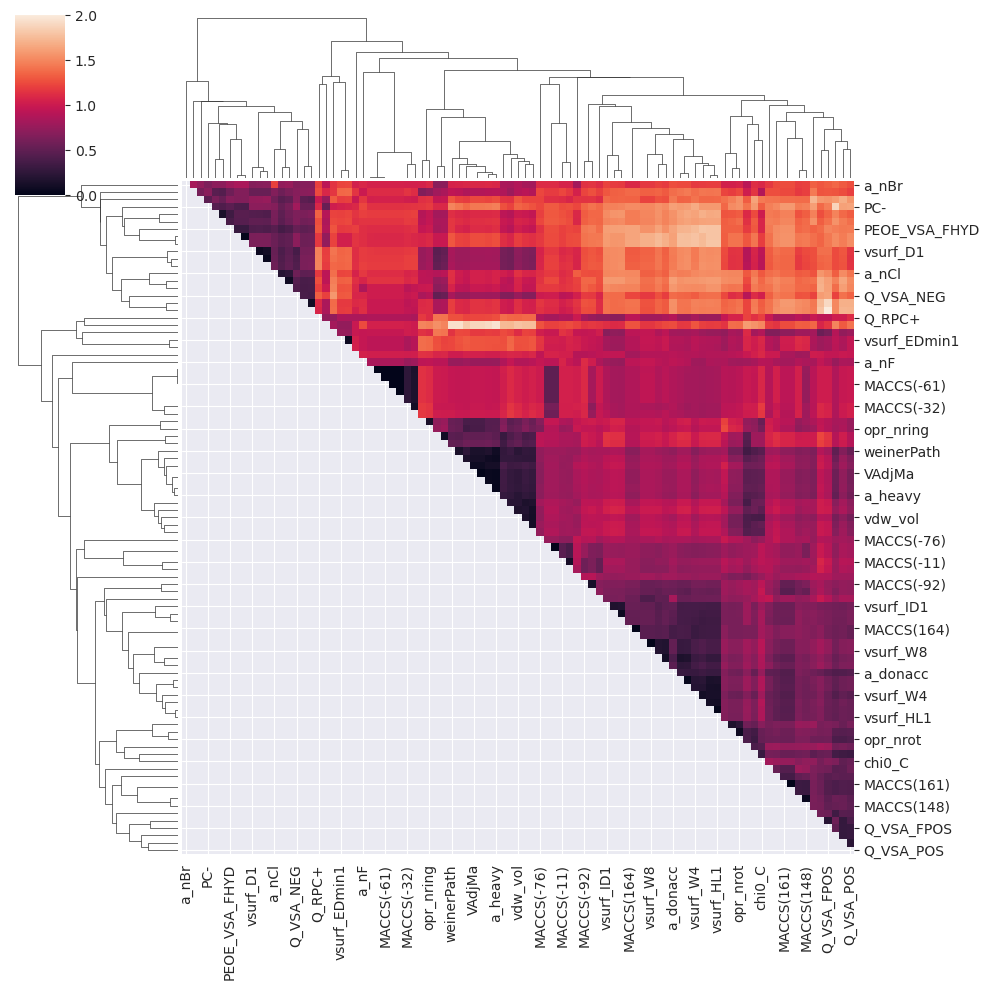

In [79]:
print("Before high correlation removal: ", df_full.shape)
df_full_correlation_removed = FS_full.remove_highly_correlated(graph=True)
print("After high correlation removal: ", df_full_correlation_removed.shape)

In [80]:
df_full[df_full.columns.difference(df_full_correlation_removed.columns)].columns

Index(['BCUT_PEOE_3', 'BCUT_SMR_0', 'FASA+', 'FASA_H', 'FCASA+', 'MACCS(-11)',
       'MACCS(-32)', 'MACCS(-47)', 'MACCS(-51)', 'MACCS(-55)', 'MACCS(-56)',
       'MACCS(-60)', 'MACCS(-61)', 'MACCS(-67)', 'MACCS(-76)', 'MACCS(-87)',
       'MACCS(-88)', 'MACCS(-92)', 'MACCS(117)', 'MACCS(122)', 'MACCS(134)',
       'MACCS(148)', 'MACCS(161)', 'MACCS(164)', 'PC+', 'PC-', 'PEOE_VSA_FHYD',
       'PEOE_VSA_FNEG', 'Q_RPC+', 'Q_RPC-', 'Q_VSA_FHYD', 'Q_VSA_FNEG',
       'Q_VSA_FPOS', 'Q_VSA_NEG', 'Q_VSA_POS', 'VAdjEq', 'VAdjMa', 'VDistMa',
       'a_acid', 'a_aro', 'a_count', 'a_donacc', 'a_heavy', 'a_nBr', 'a_nCl',
       'a_nF', 'a_nN', 'a_nO', 'a_nS', 'b_1rotN', 'b_1rotR', 'b_heavy', 'chi0',
       'chi0_C', 'diameter', 'h_log_dbo', 'h_pstrain', 'mr', 'opr_brigid',
       'opr_nring', 'opr_nrot', 'petitjean', 'pmi', 'pmi2', 'vdw_area',
       'vdw_vol', 'vol', 'vsurf_CW4', 'vsurf_CW5', 'vsurf_CW6', 'vsurf_CW7',
       'vsurf_D1', 'vsurf_D3', 'vsurf_D4', 'vsurf_EDmin1', 'vsurf_EDmin2',
   

# Proof of concept of the **transform** method

In [81]:
# Loading the data and putting it in a FeatureSelector object
df_full_train: pd.DataFrame = pd.read_csv("../../Data/full_dataset_train_divprio.csv", delimiter=';')
df_full_train["TYPE"] = "TRAIN"
df_full_test: pd.DataFrame = pd.read_csv("../../Data/full_dataset_test_divprio.csv", delimiter=';')
df_full_test["TYPE"] = "TEST"

df_full = pd.concat([df_full_train, df_full_test])
FS_full: FeatureSelector = FeatureSelector(df_full, cols_to_ignore=["TYPE"])

In [82]:
# Calling the automatic selection function
final_df: pd.DataFrame = FS_full.transform()

In [83]:
final_df.equals(df_full_correlation_removed)

True

True